In [3]:
# Load all dictionaries
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import scikit_posthocs as sp
from scipy.stats import wilcoxon

In [51]:
sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")



def heatmap(data, title):
    ax = sns.heatmap(data,vmin=0., vmax=1., cmap= 'viridis',
                    cbar_kws={"shrink": .82, 'ticks' : [0,0.25,0.5,0.75,1], 'label': 'error ($^\circ$)'}) ##sns.cm.rocket_r
    #ax = sns.heatmap(data, cmap= 'viridis') ##sns.cm.rocket_r
    ax.invert_yaxis()
    ax.figure.axes[-1].yaxis.label.set_size(15)
    plt.gca().set_ylabel('train')
    plt.gca().set_xlabel('test')
    plt.gca().set_title(title)
    #plt.gca().set_xticks([0,5,10,15,20])
    #plt.gca().set_xticklabels([0,5,10,15,20])
    #plt.gca().set_yticks([0,5,10,15,20])
    #plt.gca().set_yticklabels([0,5,10,15,20])
    plt.show(block=False)

In [52]:
path_save_signal ='C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\SVM\\cross_b001_target_mix_octave.xlsx'


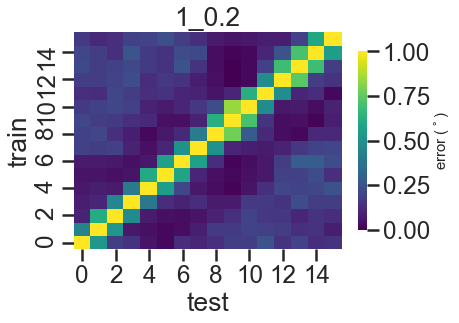

In [53]:
Df = pd.read_excel(path_save_signal, sheet_name='b001_visual_1_0.2')
heatmap(Df, '1_0.2')

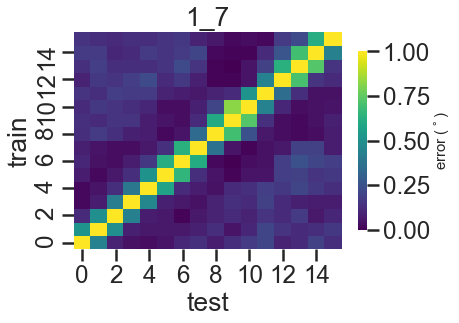

In [54]:
Df = pd.read_excel(path_save_signal, sheet_name='b001_visual_1_7')
heatmap(Df, '1_7')

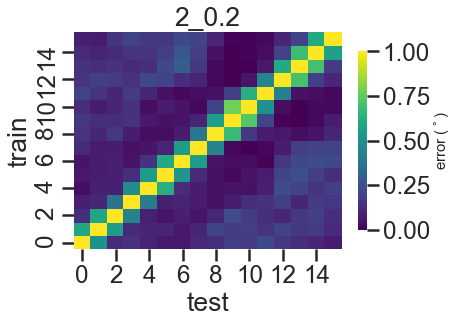

In [55]:
Df = pd.read_excel(path_save_signal, sheet_name='b001_visual_2_0.2')
heatmap(Df, '2_0.2')

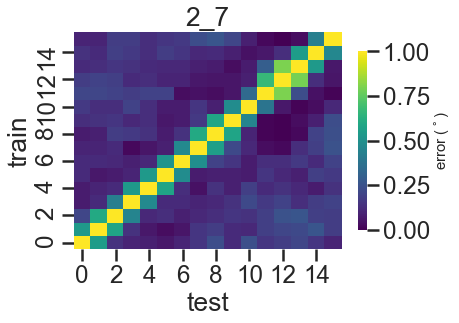

In [56]:
Df = pd.read_excel(path_save_signal, sheet_name='b001_visual_2_7')
heatmap(Df, '2_7')